In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q /content/drive/MyDrive/DigitDetector/image_train.zip -d /content/dataset

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Load and preprocess images
x = []
y = []
datadir = '/content/dataset/dataset'  # Path to your dataset
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img_resized = cv2.resize(img_gray, (32, 32))  # Resize to 32x32
        x.append(img_resized)
        y.append(folder)

print(f'Labels : {list(set(y))}')
print(f'Unique labels number : {len(list(set(y)))}')
print(f"Number of images: {len(x)}")

Labels : ['7', '4', 'mul', '0', '9', '3', 'sub', '8', '1', '5', '6', 'add', '2']
Unique labels number : 13
Number of images: 536901


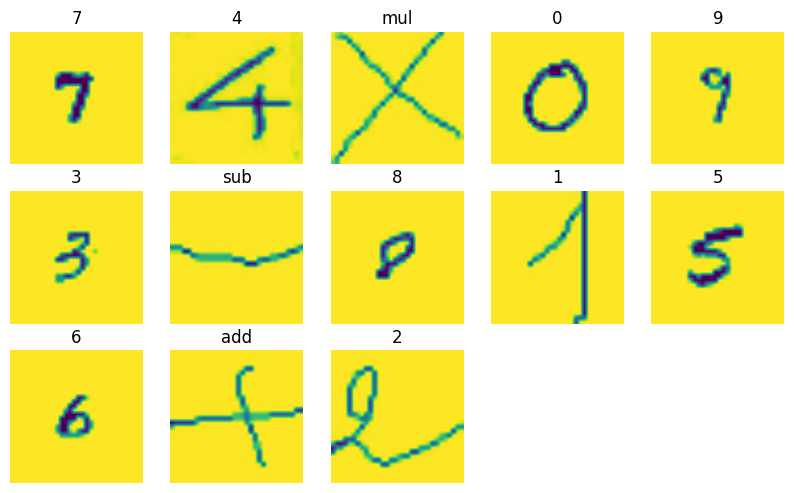

In [6]:
# Visualizing images for every unique label
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

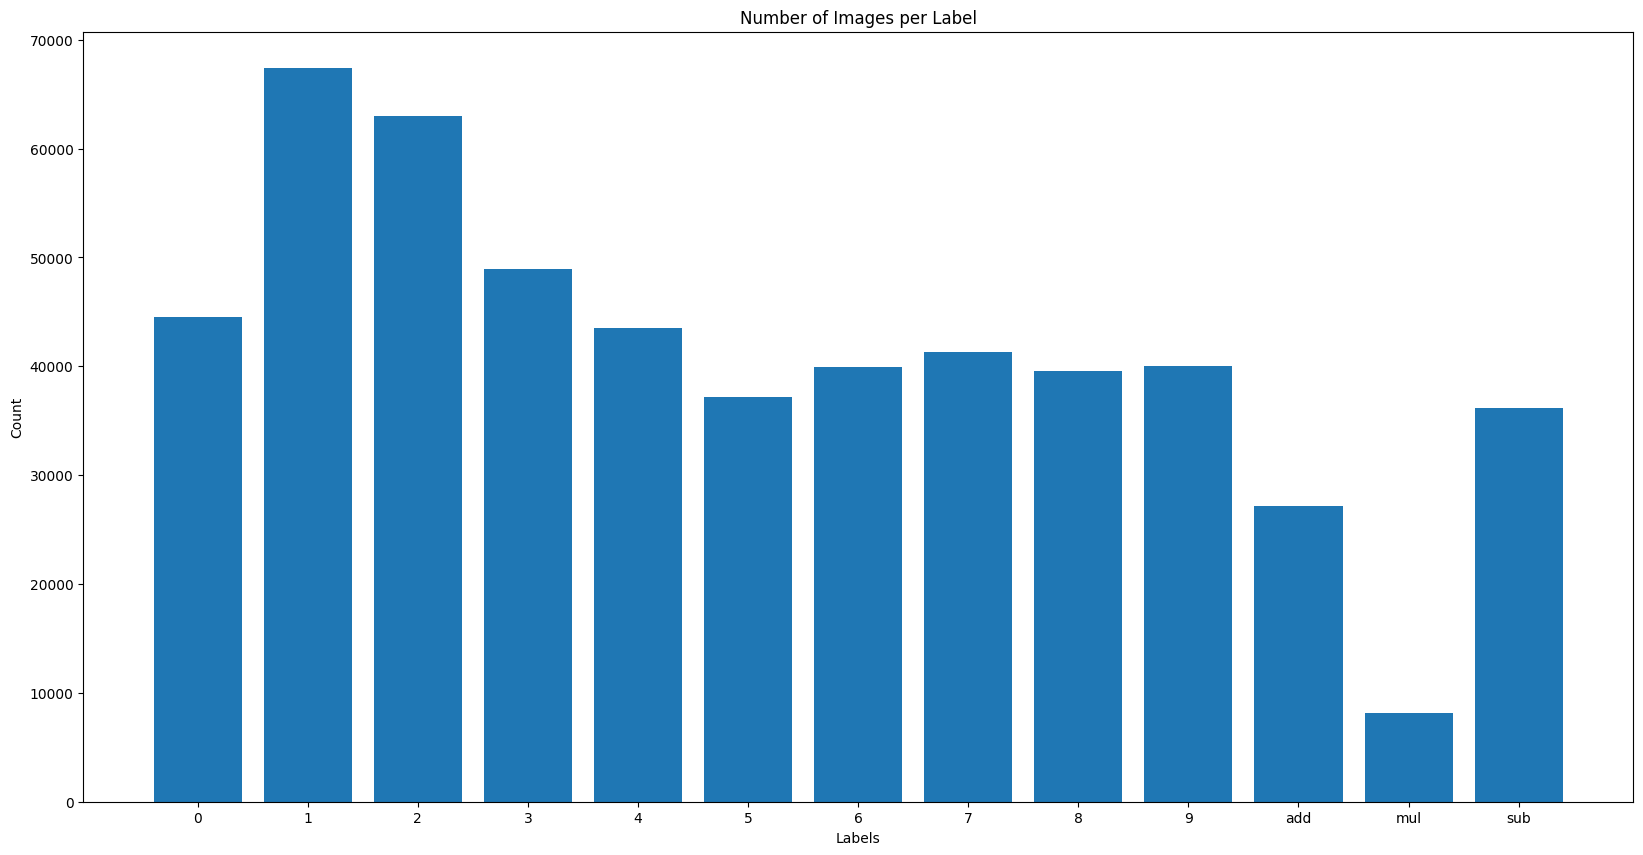

In [7]:
# Visualizing the number of images per unique label
unique_labels, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
plt.bar(unique_labels, count)
plt.title('Number of Images per Label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# 2. One-Hot Encoding
unique_labels = list(set(y))  # List of unique labels
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}  # Mapping labels to indexes
index_to_label = {idx: label for label, idx in label_to_index.items()}  # Reverse mapping

y_encoded = [label_to_index[label] for label in y]  # Convert y to numeric labels
y_encoded = to_categorical(y_encoded, num_classes=len(unique_labels))  # One-hot encode

In [10]:
# 3. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2)
x_train = np.array(x_train).reshape(-1, 32, 32, 1) / 255.0  # Normalize and reshape
x_test = np.array(x_test).reshape(-1, 32, 32, 1) / 255.0

print(len(x_train))
print(len(x_test))

429520
107381


In [11]:
# 4. Define a CNN model
def digit_recognition():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))  # First conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling layer
    model.add(Dropout(0.25))  # Dropout layer to prevent overfitting

    model.add(Conv2D(64, (3, 3), activation='relu'))  # Second conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling layer
    model.add(Dropout(0.25))  # Dropout layer to prevent overfitting

    model.add(Flatten())  # Flatten for fully connected layers
    model.add(Dense(128, activation='relu'))  # First dense layer
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = digit_recognition()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,533 (1.20 MB)

 Trainable params: 315,533 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 6. Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
13423/13423 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - accuracy: 0.8366 - loss: 0.5221 - val_accuracy: 0.9765 - val_loss: 0.0829
Epoch 2/5
13423/13423 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9535 - loss: 0.1595 - val_accuracy: 0.9836 - val_loss: 0.0603
Epoch 3/5
13423/13423 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.9620 - loss: 0.1307 - val_accuracy: 0.9846 - val_loss: 0.0555
Epoch 4/5
13423/13423 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9664 - loss: 0.1201 - val_accuracy: 0.9880 - val_loss: 0.0460
Epoch 5/5
13423/13423 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9684 - loss: 0.1105 - val_accuracy: 0.9877 - val_loss: 0.0466


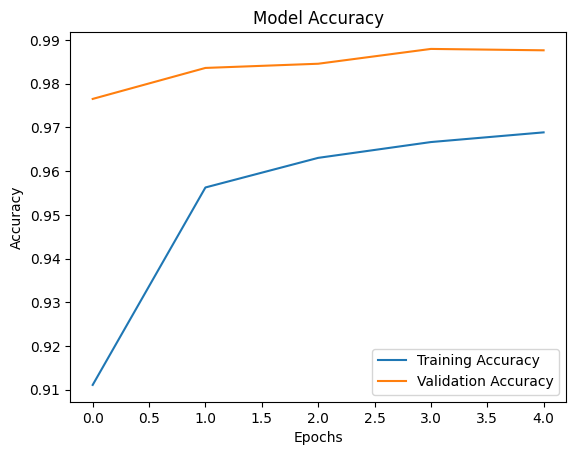

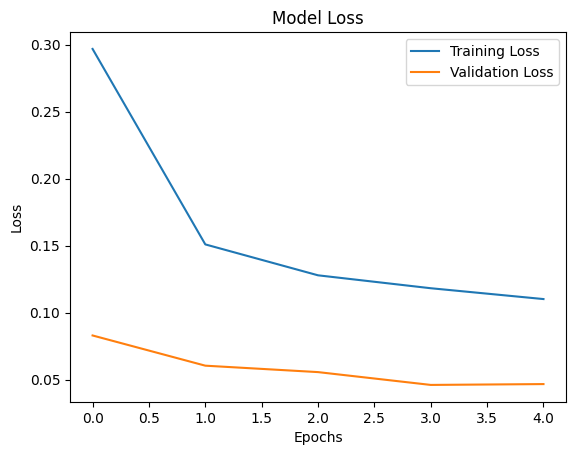

In [13]:
# 7. Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Save the model for future use
model.save('digit_recognition_model.h5')

In [15]:
# Predict the class probabilities for each test image
y_pred_proba = model.predict(x_test)

# Convert probabilities to class labels (using argmax to select the highest probability)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to label indices

3356/3356 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [16]:
# Convert the numeric labels back to the original labels
y_test_original = [index_to_label[i] for i in y_test]
y_pred_original = [index_to_label[i] for i in y_pred]

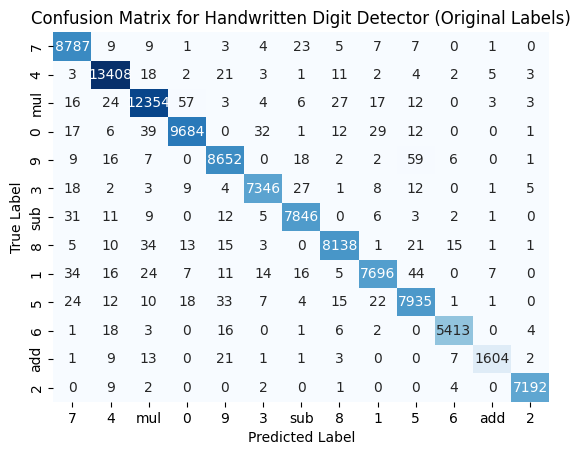

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Create the confusion matrix with decoded labels
conf_matrix = confusion_matrix(y_test_original, y_pred_original)

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Handwritten Digit Detector (Original Labels)')
plt.show()

In [18]:
# Print classification report with original labels
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=unique_labels))

Classification Report:
              precision    recall  f1-score   support

           7       0.98      0.99      0.99      8856
           4       0.99      0.99      0.99     13483
         mul       0.99      0.99      0.99     12526
           0       0.99      0.98      0.99      9833
           9       0.98      0.99      0.99      8772
           3       0.99      0.99      0.99      7436
         sub       0.99      0.99      0.99      7926
           8       0.99      0.99      0.99      8257
           1       0.99      0.98      0.98      7874
           5       0.98      0.98      0.98      8082
           6       0.99      0.99      0.99      5464
         add       0.99      0.97      0.98      1662
           2       1.00      1.00      1.00      7210

    accuracy                           0.99    107381
   macro avg       0.99      0.99      0.99    107381
weighted avg       0.99      0.99      0.99    107381



In [19]:
# 8. Count good and bad predictions
correct_predictions = np.sum(y_test == y_pred)
total_predictions = len(y_test)
incorrect_predictions = total_predictions - correct_predictions

print(f'Total predictions: {total_predictions}')
print(f'Correct predictions: {correct_predictions}')
print(f'Incorrect predictions: {incorrect_predictions}')

Total predictions: 107381
Correct predictions: 106055
Incorrect predictions: 1326
